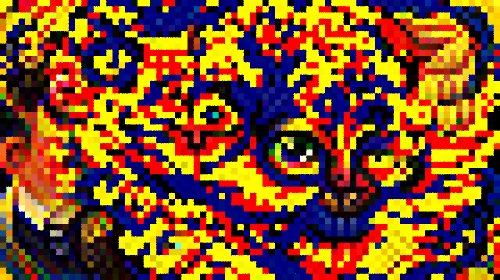<br>
"Face of cat in style of Louis Wain" with the fixed palette

# CLIPIT PixelDraw + palette enforcement demo

This notebook by <a href="https://twitter.com/altsoph">altsoph</a> is based on <a href="https://twitter.com/dribnet">dribnet</a>'s <a href='https://github.com/dribnet/clipit'>PixelDraw+CLIP</a>.<br>
This version has two new functions: palette enforcement and smoothness enforcement.

In [ ]:
#@title Setup

#@markdown Please execute this cell by pressing the _Play_ button 
#@markdown on the left. For setup,
#@markdown **you need to run this cell,
#@markdown then choose Runtime -> Restart Runtime from the menu,
#@markdown and then run the cell again**. It should remind you to
#@markdown do this after the first run.

#@markdown Setup can take 5-10 minutes, but once it is complete it usually does not need to be repeated
#@markdown until you close the window.

#@markdown **Note**: This installs the software on the Colab 
#@markdown notebook in the cloud and not on your computer.

# https://stackoverflow.com/a/56727659/1010653

# Add a gpu check
# (this can get better over time)
from google.colab import output

nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')
  warning_string = f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, THIS IS PROBABLY NOT ENOUGH <--"
  print(warning_string)
  output.eval_js('alert("Warning - low GPU (see message)")')
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

from IPython.utils import io
with io.capture_output() as captured:
  !git clone https://github.com/openai/CLIP
  # !pip install taming-transformers
  !git clone https://github.com/CompVis/taming-transformers.git
  !rm -Rf clipit
  !git clone -b enforce_palette_annealing --single-branch git://github.com/altsoph/clipit.git
  !pip install ftfy regex tqdm omegaconf pytorch-lightning
  !pip install kornia
  !pip install imageio-ffmpeg   
  !pip install einops
  !pip install torch-optimizer
  !pip install easydict
  !pip install braceexpand
  !pip install git+https://github.com/pvigier/perlin-numpy

  # ClipDraw deps
  !pip install svgwrite
  !pip install svgpathtools
  !pip install cssutils
  !pip install numba
  !pip install torch-tools
  !pip install visdom

  !git clone https://github.com/BachiLi/diffvg
  %cd diffvg
  # !ls
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..

import sys
sys.path.append("clipit")

result_msg = "setup complete"
import IPython
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  result_msg = "Please choose Runtime -> Restart Runtime from the menu, and then run Setup again"

js_code = f'''
document.querySelector("#output-area").appendChild(document.createTextNode("{result_msg}"));
'''
js_code += '''
for (rule of document.styleSheets[0].cssRules){
  if (rule.selectorText=='body') break
}
rule.style.fontSize = '30px'
'''
display(IPython.display.Javascript(js_code))

<IPython.core.display.Javascript object>

Using device: cuda:0
Optimising using: AdamP
Using text prompts: ['deep ocean monsters #pixelart']
Using seed: 1324292831876266765


0it [00:00, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


iter: 0, loss: 2.81576, losses: 1.00104, 0.889893, 0.924823, 0, -0


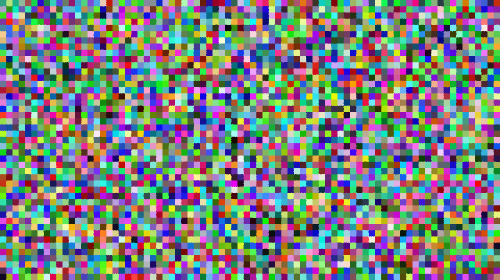

iter: 10, loss: 2.66742, losses: 0.962444, 0.824482, 0.851972, 0.0323181, -0.00379316
iter: 20, loss: 2.45153, losses: 0.88583, 0.753921, 0.743015, 0.0763954, -0.0076313


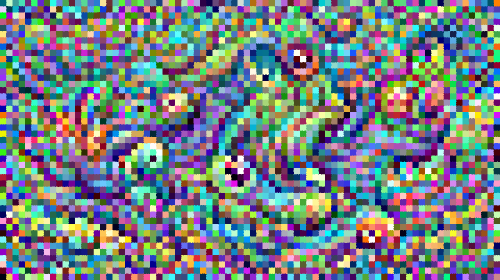

iter: 30, loss: 2.35066, losses: 0.843229, 0.709964, 0.69734, 0.111402, -0.0112733
iter: 40, loss: 2.38924, losses: 0.855362, 0.714987, 0.71572, 0.116849, -0.013673


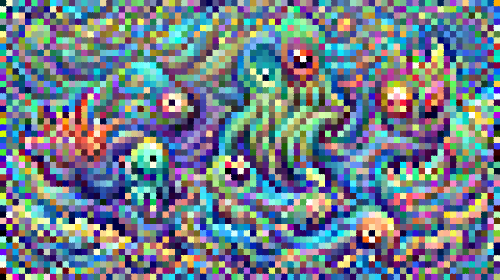

iter: 50, loss: 2.3863, losses: 0.843035, 0.707125, 0.709712, 0.143412, -0.0169824
iter: 60, loss: 2.27588, losses: 0.78804, 0.664122, 0.648396, 0.196034, -0.0207083


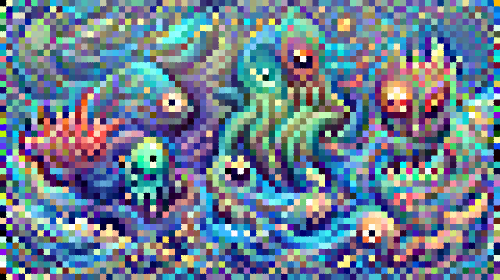

iter: 70, loss: 2.34105, losses: 0.813477, 0.686534, 0.676662, 0.188169, -0.0237875
iter: 80, loss: 2.37306, losses: 0.817417, 0.693104, 0.685623, 0.203535, -0.0266199


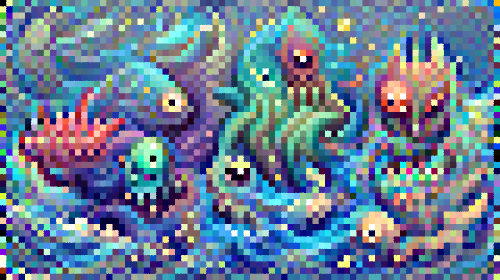

iter: 90, loss: 2.31423, losses: 0.788237, 0.666855, 0.65673, 0.232928, -0.0305167
iter: 100, loss: 2.36653, losses: 0.801095, 0.677951, 0.66426, 0.257787, -0.034566


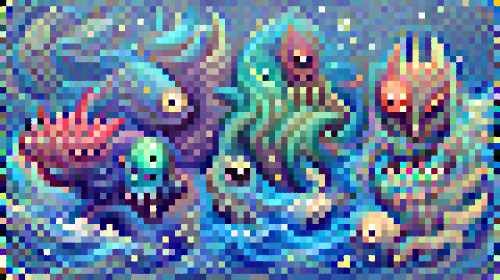

iter: 110, loss: 2.36435, losses: 0.795247, 0.670993, 0.660981, 0.27513, -0.0380001
iter: 120, loss: 2.27359, losses: 0.748224, 0.640068, 0.614987, 0.312539, -0.0422317


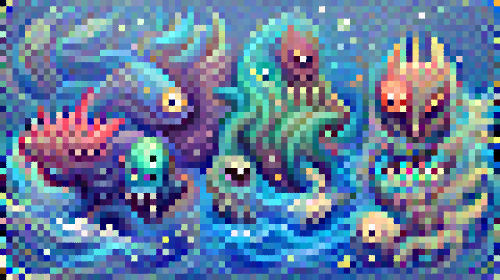

iter: 130, loss: 2.38993, losses: 0.795468, 0.662204, 0.653775, 0.325244, -0.0467644
iter: 140, loss: 2.38056, losses: 0.788609, 0.66338, 0.647068, 0.334753, -0.0532542


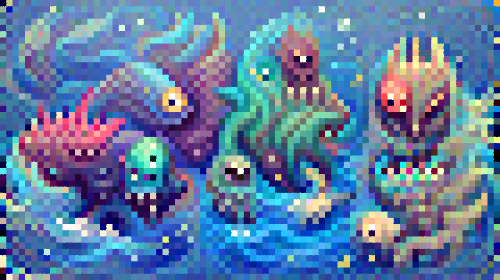

iter: 150, loss: 2.36383, losses: 0.784193, 0.664053, 0.65181, 0.322543, -0.0587718
iter: 160, loss: 2.43312, losses: 0.800888, 0.675703, 0.665135, 0.354787, -0.0633938


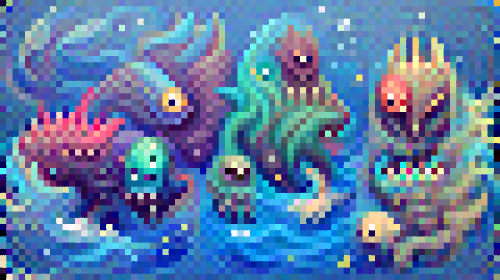

iter: 170, loss: 2.39423, losses: 0.784693, 0.662879, 0.65041, 0.361784, -0.0655344
iter: 180, loss: 2.43123, losses: 0.797053, 0.673835, 0.661001, 0.371845, -0.0725074


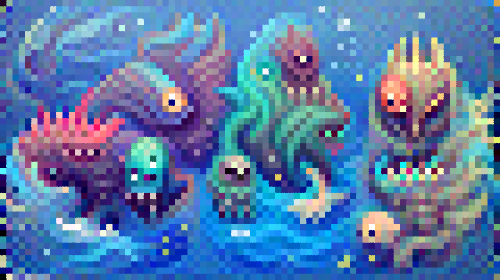

iter: 190, loss: 2.38213, losses: 0.773421, 0.655003, 0.638681, 0.391438, -0.0764084
iter: 200, loss: 2.47643, losses: 0.794548, 0.674007, 0.660431, 0.431967, -0.0845277


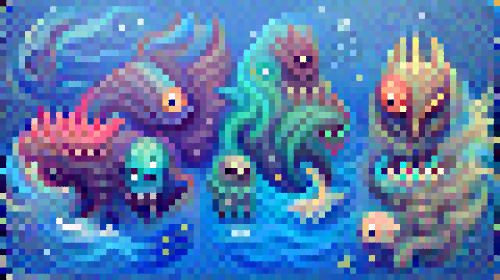

iter: 210, loss: 2.37108, losses: 0.742161, 0.640966, 0.606597, 0.475445, -0.0940837
iter: 220, loss: 2.47387, losses: 0.778236, 0.659121, 0.638945, 0.492904, -0.0953373


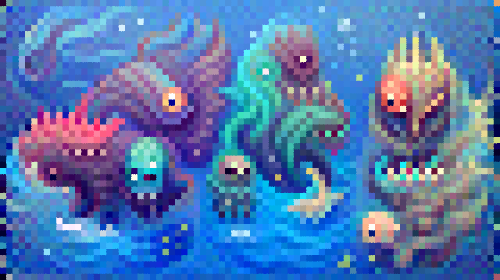

iter: 230, loss: 2.44529, losses: 0.786636, 0.663762, 0.647202, 0.447544, -0.0998527
iter: 240, loss: 2.42408, losses: 0.741882, 0.642501, 0.609182, 0.542353, -0.111837


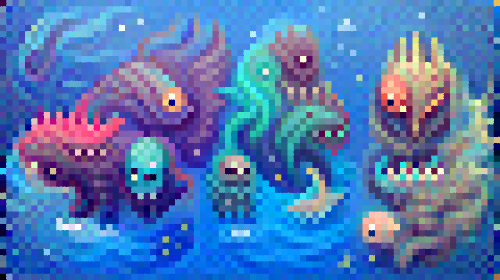

iter: 250, loss: 2.45175, losses: 0.737101, 0.637649, 0.6043, 0.591834, -0.119132
iter: 260, loss: 2.49013, losses: 0.786612, 0.670286, 0.652863, 0.500145, -0.119777


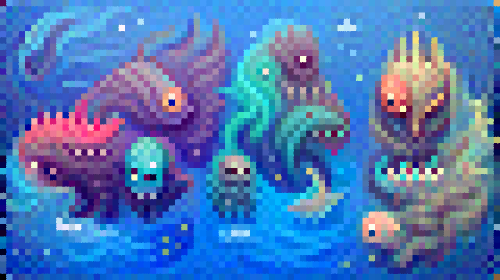

iter: 270, loss: 2.4719, losses: 0.771837, 0.649563, 0.632118, 0.545737, -0.127353
iter: 280, loss: 2.45643, losses: 0.735722, 0.636519, 0.603946, 0.619367, -0.139123


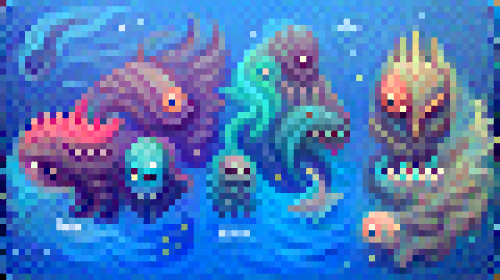

iter: 290, loss: 2.58673, losses: 0.791226, 0.669079, 0.648379, 0.619548, -0.141499
iter: 300, loss: 2.51354, losses: 0.767105, 0.650927, 0.628147, 0.619363, -0.151997


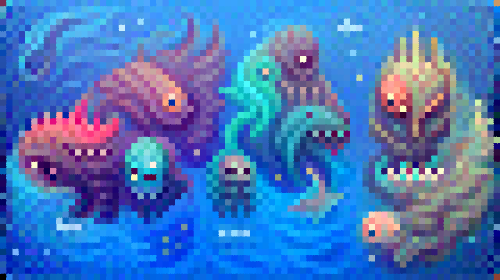

iter: 310, loss: 2.48479, losses: 0.739143, 0.635177, 0.602349, 0.670846, -0.162721
iter: 320, loss: 2.46455, losses: 0.737969, 0.641119, 0.607581, 0.651978, -0.174099


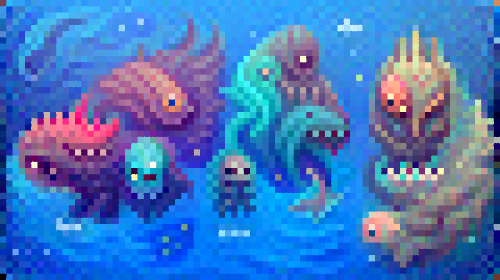

iter: 330, loss: 2.49416, losses: 0.73618, 0.638303, 0.604638, 0.692161, -0.177124
iter: 340, loss: 2.57355, losses: 0.794615, 0.672432, 0.653794, 0.637822, -0.185108


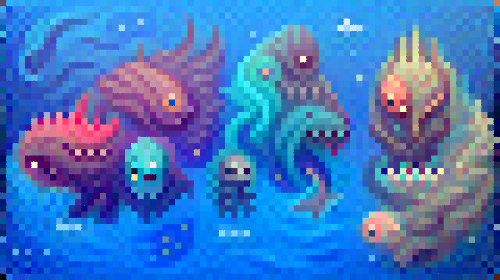

iter: 350, loss: 2.54486, losses: 0.782669, 0.667376, 0.641327, 0.645482, -0.191996
iter: 360, loss: 2.58383, losses: 0.779746, 0.657939, 0.632865, 0.709884, -0.196606


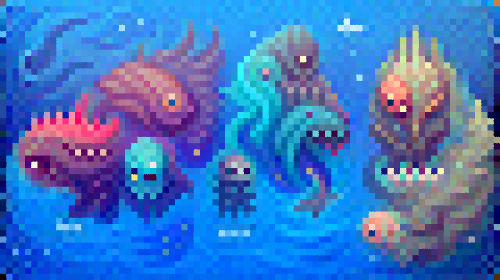

iter: 370, loss: 2.69928, losses: 0.793301, 0.668141, 0.648089, 0.794418, -0.204672
iter: 380, loss: 2.52596, losses: 0.735315, 0.634925, 0.605869, 0.764177, -0.214325


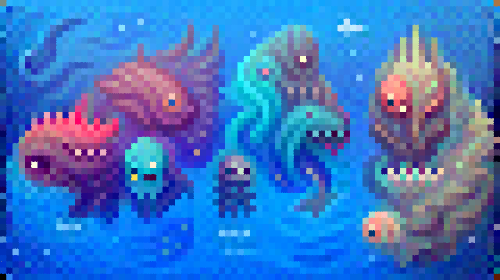

iter: 390, loss: 2.63661, losses: 0.745422, 0.63606, 0.616272, 0.865772, -0.226913
iter: 400, loss: 2.63651, losses: 0.747794, 0.641564, 0.612868, 0.872039, -0.237758


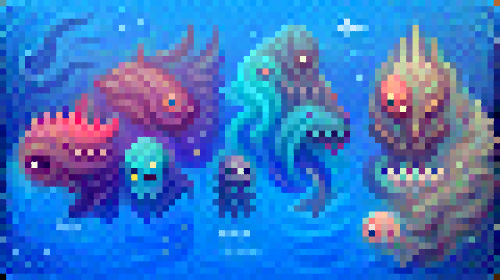

iter: 410, loss: 2.7329, losses: 0.78392, 0.659596, 0.638585, 0.886834, -0.236033
iter: 420, loss: 2.61941, losses: 0.747302, 0.638571, 0.607434, 0.883844, -0.257741


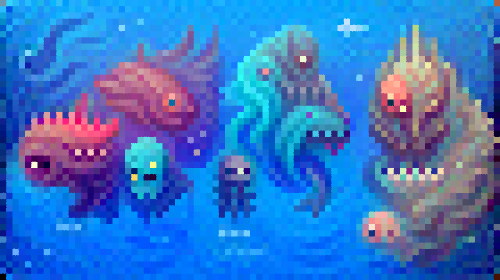

iter: 430, loss: 2.67871, losses: 0.781977, 0.666848, 0.648217, 0.830417, -0.248747
iter: 440, loss: 2.7277, losses: 0.79652, 0.66542, 0.647657, 0.88635, -0.268247


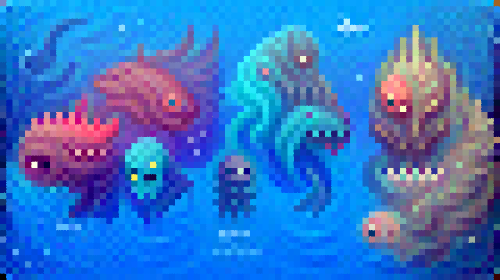

iter: 450, loss: 2.52354, losses: 0.774452, 0.659084, 0.640832, 0.711295, -0.26212
iter: 460, loss: 2.67158, losses: 0.750201, 0.644238, 0.614909, 0.949584, -0.287353


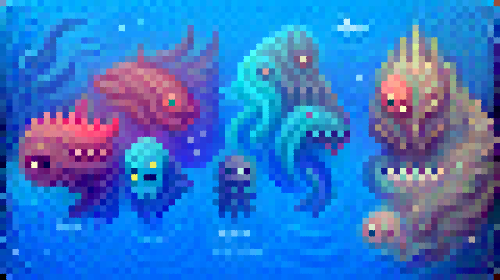

iter: 470, loss: 2.7496, losses: 0.796097, 0.674001, 0.653828, 0.897862, -0.272192
iter: 480, loss: 2.73233, losses: 0.788602, 0.665453, 0.644627, 0.929352, -0.295703


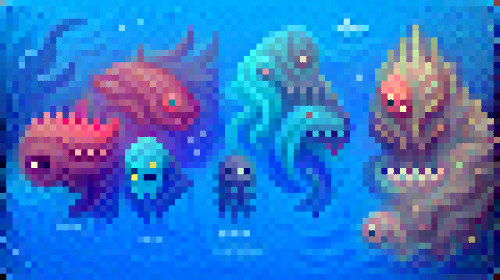

iter: 490, loss: 2.74268, losses: 0.790654, 0.662469, 0.641465, 0.949015, -0.300922
iter: 500, loss: 2.713, losses: 0.739396, 0.6373, 0.61037, 1.04457, -0.318637


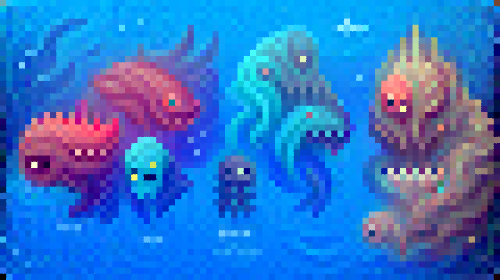

In [ ]:
#@title Settings

#@markdown Enter a description of what you want to draw - I usually add #pixelart to the prompt.
#@markdown If PixelDraw is not used, it will use VQGAN instead.
#@markdown <br>

prompts = "deep ocean monsters #pixelart" #@param {type:"string"}

aspect = "widescreen" #@param ["widescreen", "square"]

use_pixeldraw = True #@param {type:"boolean"}

#@markdown Specify the desired palette ("" for default), here are examples of what can be parsed:
#@markdown * white   (16 color black to white ramp)
#@markdown * red     (16 color black to red ramp)
#@markdown * rust\8  (8 color black to rust ramp)
#@markdown * red->rust         (16 color red to rust ramp)
#@markdown * red->#ff0000      (16 color red to yellow ramp)
#@markdown * red->#ff0000\20   (20 color red to yellow ramp)
#@markdown * black->red->white (16 color black/red/white ramp)
#@markdown * [black, red, #ff0000] (three colors)
#@markdown * [#000000, #ff0000, #ffff00, #000080] (four colors)
#@markdown * red->white;blue->yellow (32 colors across two ramps of 16)
#@markdown * red;blue;yellow         (48 colors from combining 3 ramps)
#@markdown * red\8;blue->yellow\8    (16 colors from combining 2 ramps)
#@markdown * red->yellow;[black]     (16 colors from ramp and also black)
#@markdown * (for example: ):

use_palette = "" #@param {type:"string"}
#@markdown Use this flag to activate the smoothess enforcement:
force_smoothness = True #@param {type:"boolean"} 

#@markdown Use this flag to activate the saturation enforcement (use it against color fading):
force_saturation = True #@param {type:"boolean"} 

#@markdown When you have the settings you want, press the play button on the left.
#@markdown The system will save these and start generating images below.

#@markdown When that is done you can change these
#@markdown settings and see if you get different results. Or if you get
#@markdown impatient, just select "Runtime -> Interrupt Execution".
#@markdown Note that the first time you run it may take a bit longer
#@markdown as nessary files are downloaded.


#@markdown
#@markdown *Advanced: you can also edit this cell and add add additional
#@markdown settings, combining settings from different notebooks.*


# Simple setup
import clipit

# these are good settings for pixeldraw
clipit.reset_settings()
clipit.add_settings(prompts=prompts, aspect=aspect)
clipit.add_settings(quality="better", scale=2.5)
clipit.add_settings(use_pixeldraw=use_pixeldraw)

# palette = None
if use_palette and use_palette!='None':
  clipit.add_settings(target_palette=use_palette)
# if force_palette == "custom" and use_palette.strip():
#   import matplotlib.colors
#   palette = [matplotlib.colors.to_rgb(c.strip()) for c in use_palette.strip().split(',')]
# elif force_palette == "green":
#   palette = [[0.44*i*16/256,i*16/256,0.53*i*16/256] for i in range(16)]
# elif force_palette == "orange":
#   palette = [[i*16/256,0.8*i*16/256,0.2*i*16/256] for i in range(16)]
# elif force_palette == "blue":
#   palette = [[0.44*i*16/256,0.53*i*16/256,i*16/256] for i in range(16)]
# elif force_palette == "red":
#   palette = [[i*16/256,0.53*i*16/256,0.44*i*16/256] for i in range(16)]
# elif force_palette == "grayscale":
#   palette = [[i*16/256,i*16/256,i*16/256] for i in range(16)]
# palette = 'red'
# if palette and palette_annealing:
#   clipit.add_settings(target_palette=palette) #, enforce_palette_annealing=palette_annealing)

if force_smoothness and force_smoothness!='None':
  clipit.add_settings(enforce_smoothness=50, enforce_smoothness_type='log')
  # if force_smoothness in ('clipped','log'):
  #   clipit.add_settings(enforce_smoothness_type=force_smoothness)

if force_saturation:
  clipit.add_settings(enforce_saturation=1000)

clipit.add_settings(noise_prompt_seeds=[1,2,3])


#### YOU CAN ADD YOUR OWN CUSTOM SETTING HERE ####
# this is the example of how to run longer with less frequent display
# clipit.add_settings(iterations=500, display_every=50)

settings = clipit.apply_settings()
clipit.do_init(settings)
clipit.do_run(settings)
